<h1>Convulotional Neural Network</h1>

In [29]:
from keras import models
from keras import layers

In [30]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [31]:
%matplotlib inline

In [95]:
model = models.Sequential()
# filters, kernelshape, activation, inputshape
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # 1D vector, 2D matrix, etc.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.Reshape((64,)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu')) # linear activation if no activation function is given
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_95 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_17 (Flatten)         (None, 576)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 64)                36928     
__________

None is for training batch

32 in output shape in first layer is the number of filters the model has for each kernel it'll look at (kind of memory to "store" different information)

"Conv is looking for features, MaxPooling is gathering features"

One issue of this type of NN is that it ignores spatial relationships

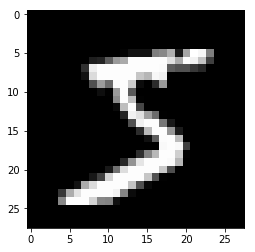

In [96]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.imshow(train_images[0], cmap='gray')
plt.show()

# changing shape of images because this network takes vectors as input
train_images = train_images.reshape((60000, 28, 28, 1)) # (for RGB images: (60000, 28, 28, 3))
test_images = test_images.reshape((10000, 28, 28, 1))
# print(np.max(train_images[0]))

# normalizing data for the network (prefers working with floats from 0.0 to 1.0 rather than int from 0 to 255)
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
# print(np.max(train_images[0]))

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [97]:
from keras import losses
from keras import optimizers
from keras import metrics

In [98]:
model.compile(
    optimizer=optimizers.RMSprop(lr=0.01),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

# model.compile(
#     optimizer='rmsprop',
#     loss='categorical_crossentropy',
#     metrics=['accuracy']
# )

In [99]:
# In proctice we would do cross-validation
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=5,
    batch_size=64, # good to start with 128 for big dataset
    validation_data=(x_val, y_val)
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
34624/50000 [===================>..........] - ETA: 16s - loss: 0.4709 - categorical_accuracy: 0.8578

KeyboardInterrupt: 

In [ ]:
# set up a validation set in order to run this cell

history_dict = history.history
print(history_dict.keys())
acc = 'categorical_accuracy'
val_acc = 'val_categorical_accuracy'
loss = 'loss'
val_loss = 'val_loss'

loss_values = history_dict[loss]
val_loss_values = history_dict[val_loss]
epochs = range(1, len(loss_values) + 1)

acc_values = history_dict[acc]
val_acc_values = history_dict[val_acc]
epochs = range(1, len(acc_values) + 1)

plt.figure(figsize=(20,6))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.legend(['training', 'validation'])

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_values)
plt.plot(epochs, val_acc_values)
plt.legend(['training', 'validation'])

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)